In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-24.009107097064216 34.72279124714203
1.8308558414284306 68.37861140255521
28.757094617365908 91.8832069454254
-66.00079353274262 -145.86434869506976
-84.72835480200615 67.77119411153402
73.26992657629015 47.953541318459344
-39.36709369194301 144.7494837987207
-77.03871019454255 172.85390383270163
13.169634581978286 52.467466091591746
-67.05443598697087 -95.39366279115876
67.43309087913914 -153.49040613557148
-13.002462752533376 -63.353171554694256
-12.351693882798756 -168.6977873640925
-29.571471071416738 -95.14594792469958
-40.224569412911286 8.928512688399394
9.88412242901066 -15.13938490088438
-29.13315262956707 113.74019117510778
-55.26111995172319 138.16217191874057
-70.22705751714768 -149.03002549831828
-45.26253565993699 -100.63837642775025
78.41707905664555 136.30676449423038
23.166158897302424 176.26112441381025
-10.985330057670481 -173.02332622068715
-7.911906029054293 89.0826074629395
-18.475001599628342 -123.48439683310255
53.4170379979594 83.73983749385923
48.965671801091

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maxixe
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | tawang
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | crib point
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | bereda
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | rolim de moura
City not found. Skipping...
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | sangueya
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | nizhneyansk
City no

Processing Record 37 of Set 4 | matli
Processing Record 38 of Set 4 | tautira
Processing Record 39 of Set 4 | coihaique
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | ploemeur
Processing Record 42 of Set 4 | novovyazniki
Processing Record 43 of Set 4 | chapais
Processing Record 44 of Set 4 | mahajanga
Processing Record 45 of Set 4 | pontianak
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | mackenzie
Processing Record 49 of Set 4 | yerbogachen
Processing Record 50 of Set 4 | gao
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | vastervik
City not found. Skipping...
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | marzuq
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | huarmey
Processing Record 10 of Set 5 | h

Processing Record 29 of Set 8 | urdoma
Processing Record 30 of Set 8 | kokopo
Processing Record 31 of Set 8 | kenai
Processing Record 32 of Set 8 | am timan
Processing Record 33 of Set 8 | vagur
Processing Record 34 of Set 8 | beyneu
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | canutama
Processing Record 37 of Set 8 | meadow lake
Processing Record 38 of Set 8 | warrnambool
Processing Record 39 of Set 8 | dzhankoy
Processing Record 40 of Set 8 | naters
Processing Record 41 of Set 8 | tsiroanomandidy
Processing Record 42 of Set 8 | lardos
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | la sarre
Processing Record 45 of Set 8 | altamira
Processing Record 46 of Set 8 | nkhata bay
Processing Record 47 of Set 8 | bairnsdale
Processing Record 48 of Set 8 | martapura
Processing Record 49 of Set 8 | ahipara
Processing Record 50 of Set 8 | sicuani
Processing Record 1 of Set 9 | biak
Processing Record 2 of Set 9 | pacasmayo
Processing Recor

Processing Record 19 of Set 12 | boa vista
Processing Record 20 of Set 12 | lodwar
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | boca do acre
Processing Record 23 of Set 12 | lingao
Processing Record 24 of Set 12 | manta
Processing Record 25 of Set 12 | awjilah
Processing Record 26 of Set 12 | sosnovo
Processing Record 27 of Set 12 | carrickfergus
Processing Record 28 of Set 12 | roebourne
Processing Record 29 of Set 12 | kongoussi
Processing Record 30 of Set 12 | erenhot
Processing Record 31 of Set 12 | erzin
Processing Record 32 of Set 12 | andenes
Processing Record 33 of Set 12 | kumano
Processing Record 34 of Set 12 | luderitz
Processing Record 35 of Set 12 | soyo
Processing Record 36 of Set 12 | zhumadian
Processing Record 37 of Set 12 | obera
Processing Record 38 of Set 12 | koutsouras
Processing Record 39 of Set 12 | pemberton
Processing Record 40 of Set 12 | shatsk
Processing Record 41 of Set 12 | adrian
Processing Record 42 of Set 12 | ruteng
Pro

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maxixe,-23.8597,35.3472,76.53,82,88,9.75,MZ,2023-01-26 20:57:42
1,Kudahuvadhoo,2.6708,72.8944,80.64,75,44,9.57,MV,2023-01-26 20:57:44
2,Tawang,27.5833,91.8667,34.20,71,36,5.21,IN,2023-01-26 20:57:44
3,Mataura,-46.1927,168.8643,57.15,97,100,8.08,NZ,2023-01-26 20:57:45
4,Crib Point,-38.3500,145.2000,61.65,74,0,10.71,AU,2023-01-26 20:57:45
5,Bluff,-46.6000,168.3333,55.92,89,100,16.53,NZ,2023-01-26 20:57:45
6,Bereda,43.2686,-7.5406,44.15,100,97,6.46,ES,2023-01-26 20:53:55
7,Punta Arenas,-53.1500,-70.9167,53.71,47,40,27.63,CL,2023-01-26 20:57:46
8,Barrow,71.2906,-156.7887,-13.31,95,100,17.02,US,2023-01-26 20:57:46
9,Lebu,-37.6167,-73.6500,63.59,72,0,13.69,CL,2023-01-26 20:57:46


In [29]:
new_column_order = ["column2", "column4", "column1"]


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

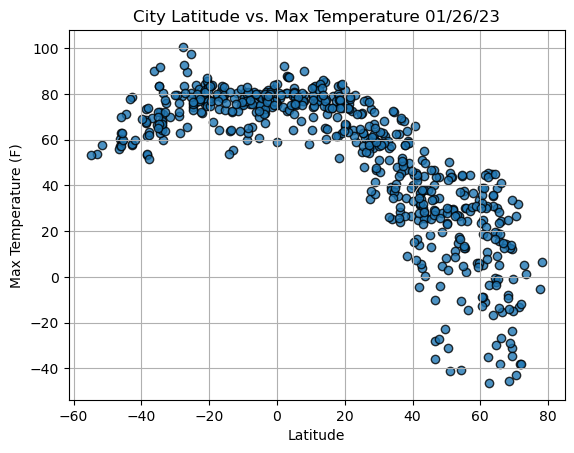

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

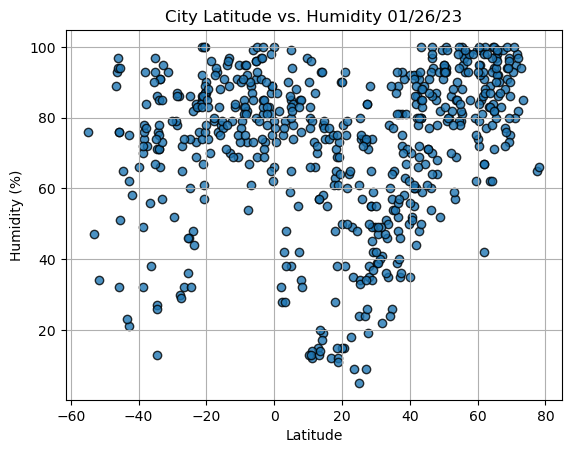

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

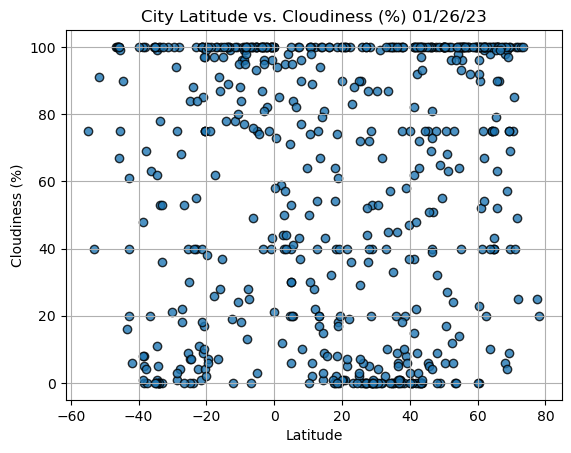

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

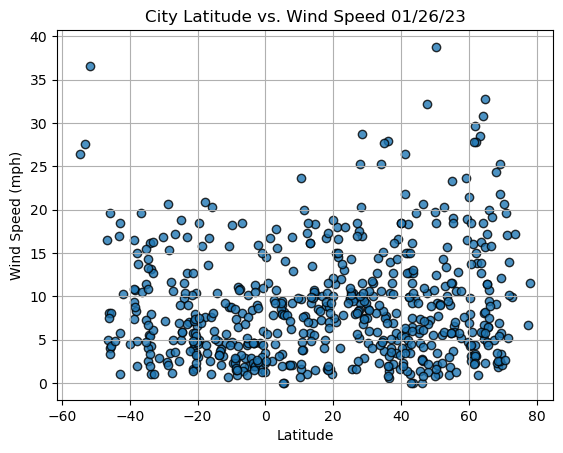

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()